# Post harvest crops losses in India 
###### _**base on Rajya-Sabha Sessions,MoFPI,NABCONS data year covered 2019-2022**_


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_2020 = pd.read_csv(r"../data/RS_Session_265_AU_1295_1_2019_20.csv")
df_2022 = pd.read_csv(r"../data/RS_Session_259_AU_976_A_to_B_2022_and_MoFPI_NABCONS.csv")


## Data Cleaninig

In [3]:
df_2020 = df_2020.drop(columns = ['Sl. No'])



In [4]:
df_2022[['Low','High']] = df_2022['Loss (%)'].str.split('-',expand=True)
df_2022['Low'] = df_2022['Low'].astype(float)
df_2022['High'] = df_2022['High'].astype(float)

# Calculate average
df_2022['Avg Loss (%)'] = df_2022[['Low', 'High']].mean(axis=1)
df_2022['Avg Loss (%)'] = df_2022['Avg Loss (%)'].round(2) 

df_2022 = df_2022.drop(['Low', 'High','Loss (%)'], axis=1)

In [5]:

sum_up_df = df_2020.groupby("Crops", as_index=False)["% Average Loss"].mean()
sum_up_df["% Average Loss"] = sum_up_df["% Average Loss"].round(2)
sum_up_df = sum_up_df[sum_up_df['Crops']!= 'Livestock Produce']
sum_up_df = sum_up_df.reset_index(drop=True)



In [6]:
sum_up_df

,Crops,% Average Loss
0,Cereals,4.62
1,Fruits,8.30
2,Oilseed,4.67
3,Plantation Crops and Spices,4.68
4,Pulses,6.10
5,Vegetables,7.04


In [7]:
df_2022

,Crops/ Commodities,Avg Loss (%)
0,Cereals,4.90
1,Pulses,6.20
2,Oilseed,5.19
3,Fruits,10.54
4,Vegetables,8.24
5,Plantation Crops and Spices,4.31


In [8]:
sum_up_df = sum_up_df.rename(columns={"% Average Loss": "2020 Loss (%)"})
sum_up_df = sum_up_df.rename(columns={"Crops/ Commodities": "Crops"})
df_2022 = df_2022.rename(columns={"Avg Loss (%)": "2022 Loss (%)"})
df_2022 = df_2022.rename(columns={"Crops/ Commodities": "Crops"})
df_2020 = df_2020.rename(columns={"% Average Loss" : "2020 Loss (%)"} )

In [9]:
merged_df = pd.merge(sum_up_df, df_2022, on="Crops", how="outer")
merged_df["Change (%)"] = merged_df["2022 Loss (%)"] - merged_df["2020 Loss (%)"]
merged_df = merged_df.round(2)


## Visualization

### Static Visualization

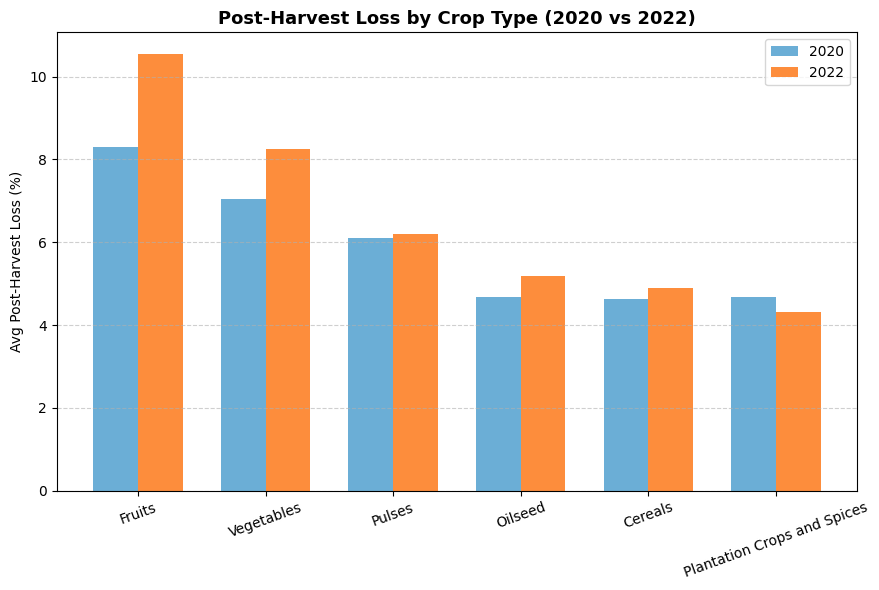

In [10]:
merged_df = merged_df.sort_values("2022 Loss (%)", ascending=False)

x = np.arange(len(merged_df["Crops"])) 
width = 0.35

plt.figure(figsize=(9,6))
plt.bar(x - width/2, merged_df["2020 Loss (%)"], width, label="2020", color="#6baed6")
plt.bar(x + width/2, merged_df["2022 Loss (%)"], width, label="2022", color="#fd8d3c")

plt.xticks(x, merged_df["Crops"], rotation=20)
plt.ylabel("Avg Post-Harvest Loss (%)")
plt.title("Post-Harvest Loss by Crop Type (2020 vs 2022)", fontsize=13, fontweight="bold")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\rajas\AppData\Local\Temp\ipykernel_18740\812798375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x="Crops", y="Change (%)", palette="RdYlGn_r", edgecolor="black")


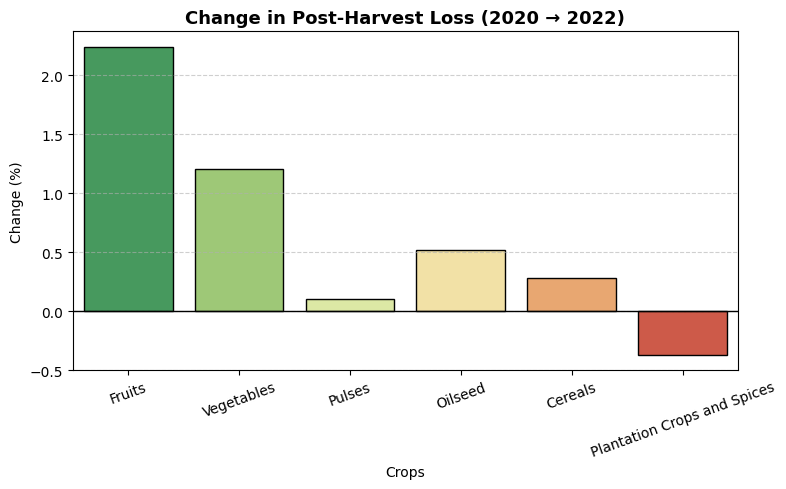

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x="Crops", y="Change (%)", palette="RdYlGn_r", edgecolor="black")

plt.title("Change in Post-Harvest Loss (2020 → 2022)", fontsize=13, fontweight="bold")
plt.axhline(0, color="black", linewidth=1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

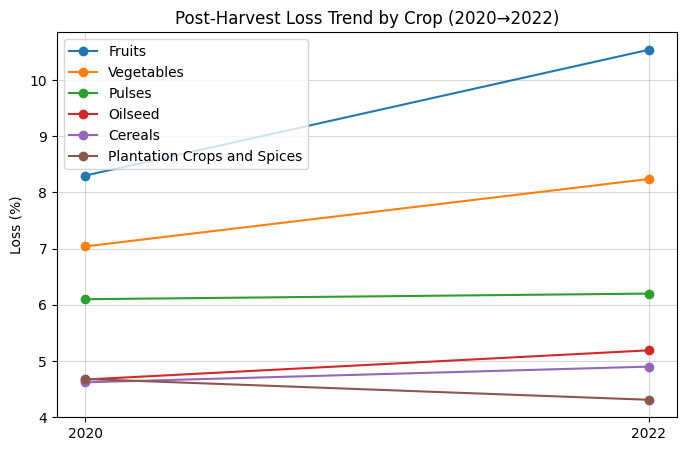

In [12]:
plt.figure(figsize=(8,5))
for _, row in merged_df.iterrows():
    plt.plot(["2020", "2022"], [row["2020 Loss (%)"], row["2022 Loss (%)"]], 
             marker="o", label=row["Crops"])
plt.title("Post-Harvest Loss Trend by Crop (2020→2022)")
plt.ylabel("Loss (%)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


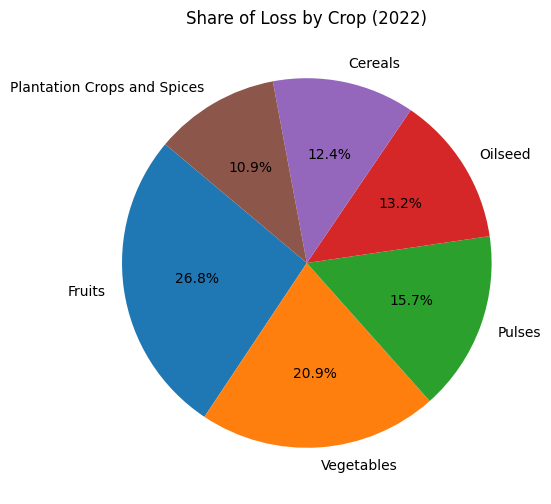

In [13]:
plt.figure(figsize=(6,6))
plt.pie(merged_df["2022 Loss (%)"], labels=merged_df["Crops"], autopct='%1.1f%%', startangle=140)
plt.title("Share of Loss by Crop (2022)")
plt.show()


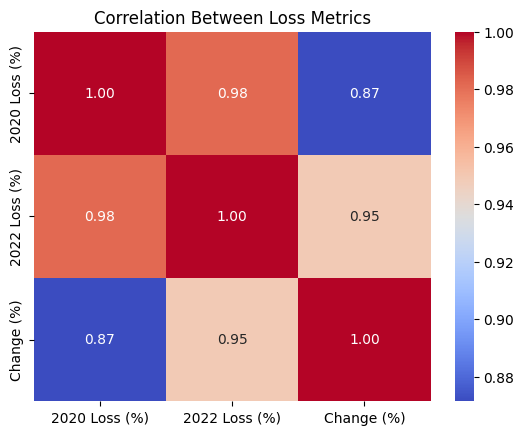

In [14]:
df_num = merged_df.select_dtypes(include='number')
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Loss Metrics")
plt.show()


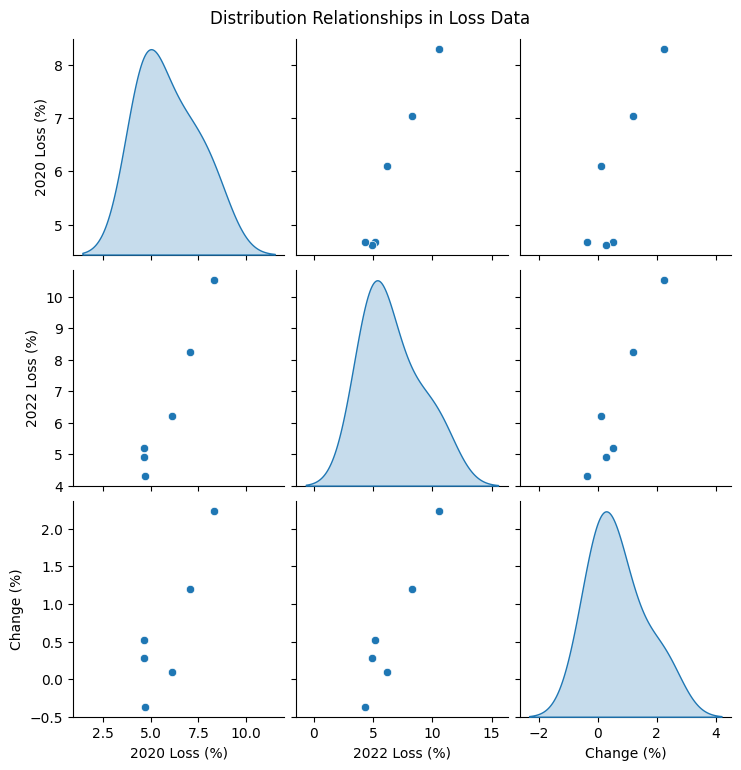

In [15]:
sns.pairplot(merged_df, diag_kind='kde')
plt.suptitle("Distribution Relationships in Loss Data", y=1.02)
plt.show()


### Interactive PLots

In [16]:


fig = go.Figure()

fig.add_trace(go.Bar(
    x=merged_df["Crops"],
    y=merged_df["2020 Loss (%)"],
    name="2020",
    marker_color="#1f77b4"
))

fig.add_trace(go.Bar(
    x=merged_df["Crops"],
    y=merged_df["2022 Loss (%)"],
    name="2022",
    marker_color="#ff7f0e"
))

fig.update_layout(
    title="Interactive Post-Harvest Loss Comparison (2020 vs 2022)",
    xaxis_title="Crop Type",
    yaxis_title="Avg Loss (%)",
    barmode="group",
    template="plotly_white",
    hovermode="x unified"
)

fig.show()


In [17]:


df_long = merged_df.melt(id_vars='Crops', 
                         value_vars=['2020 Loss (%)', '2022 Loss (%)'],
                         var_name='Year', value_name='Loss (%)')

fig = px.line(df_long, x='Year', y='Loss (%)', color='Crops', 
              markers=True, title='Interactive Loss Trend (2020–2022)')
fig.update_layout(template='plotly_white')
fig.show()


In [18]:
fig = px.bar(merged_df, x='Crops', y='Change (%)', 
             color='Change (%)', color_continuous_scale='RdYlGn_r',
             title='Change in Loss (Interactive)')
fig.update_layout(template='plotly_white')
fig.show()


In [19]:
fig = px.scatter(merged_df, 
                 x='2020 Loss (%)', y='Change (%)', 
                 color='Crops', size='2022 Loss (%)',
                 hover_name='Crops', 
                 title='Scatter: 2020 Loss vs Change (Improvement/Worsening)',
                 template='plotly_white')
fig.show()


In [20]:
fig = px.pie(merged_df, values='2022 Loss (%)', names='Crops', 
             hole=0.4, title='Share of Crop Loss (2022)',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()


In [21]:
merged_df.to_csv("../data/derived_from_RS_Session_265_AU_1295.csv",index=False)